## Clustering Orange survey data with K-Means, DBSCAN and Louvain method

First we read the data and preprocess it for later use. We can remove few unrelavent atributes like: "Start Date (UTC)", "Submit Date (UTC)", "Network ID", "#", "Other", "Other.1", "Other.2", "Other.3". All atributes in data are optional, that means that there are only a few different values in each column. If we can look at columns "Excel", "IBM SPSS Statistics", "KNIME", "MATLAB", "Python", "Python Pandas", "R", "Rapid Miner","SQL", "Weka","None", we can see that this columns structure can be changed to binary form.   


In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score, mutual_info_score,cohen_kappa_score, homogeneity_score
import community
import networkx as nx
from sklearn import metrics
import sklearn.neighbors as sk
import numpy as np


In [2]:
data = pd.read_csv("../data/Orange questionnaire.csv")

# drop all unrelavant atributes
data = data.drop("#", axis=1)
data = data.drop("Other", axis=1)
data = data.drop("Other.1", axis=1)
data = data.drop("Other.2", axis=1)
data = data.drop("Other.3", axis=1)
data = data.drop("Start Date (UTC)", axis=1)
data = data.drop("Submit Date (UTC)", axis=1)
data = data.drop("Network ID", axis=1)
# change columns from index 3 to 14 to binary values and calculate their frequency
data = data.sample(n=1000)
for n in range(3, 15):
    data.iloc[:, n] = (~data.iloc[:, n].isnull()).astype(int)
    
original = data.copy(deep=False)
for n in range(3, 15):
    tmp = (data.iloc[:, n].value_counts()/len(data)).to_dict()
    data.iloc[:, n] = data.iloc[:, n].replace(tmp)





#### Data analysis and visualization

Here we represent each atribute, so we can see how many of each values are in it. Then we use t-SNE method for dimension reduction, so we can visualize multidimensional data in 2D space. We use t-SNE with different paramters, so we can se the difference how structure changes.

In [3]:
for a in original:
    print(original[a].value_counts()/len(original),"\n")

Web           0.362
Anaconda      0.223
College       0.132
School        0.075
Job           0.064
Friends       0.060
Conference    0.024
Name: Where did you find out about Orange?, dtype: float64 

Beginner        0.695
Intermediate    0.224
Expert          0.060
Name: What Data Mining level are you?, dtype: float64 

Industry         0.316
I'm a student    0.291
Academia         0.195
Research         0.133
Name: Where do you work?, dtype: float64 

1    0.617
0    0.383
Name: Excel, dtype: float64 

0    0.875
1    0.125
Name: IBM SPSS Statistics, dtype: float64 

0    0.952
1    0.048
Name: KNIME, dtype: float64 

0    0.796
1    0.204
Name: MATLAB, dtype: float64 

0    0.537
1    0.463
Name: Python, dtype: float64 

0    0.794
1    0.206
Name: Python Pandas, dtype: float64 

0    0.703
1    0.297
Name: R, dtype: float64 

0    0.932
1    0.068
Name: Rapid Miner, dtype: float64 

0    0.656
1    0.344
Name: SQL, dtype: float64 

0    0.882
1    0.118
Name: Weka, dtype: float64 


In [4]:
# Replace NaN values with 0 and strings to numbers.
level = {"Expert": 3, "Beginner": 1, "Intermediate": 2, 0: 0, "NaN": 0}

job = {"Academia": 3, "Research": 1, "I'm a student": 2, 0: 0, "Industry": 4}

find_out = {"College": 1, "Conference": 2, "Web": 3, "Friends": 4, "School": 5, "Job": 6, "Anaconda": 7, 0: 0}


data["Where do you work?"] = data["Where do you work?"].fillna(0)
data["Where do you work?"] = data["Where do you work?"].replace(job)


data["What Data Mining level are you?"] = data["What Data Mining level are you?"].fillna(0)
data["What Data Mining level are you?"] = data["What Data Mining level are you?"].replace(level)

data["Where did you find out about Orange?"] = data["Where did you find out about Orange?"].fillna(0)
data["Where did you find out about Orange?"] = data["Where did you find out about Orange?"].replace(find_out)




In [5]:
# print(data.head())
# print(data["What Data Mining level are you?"].value_counts()/len(data))
level_freq = (data["What Data Mining level are you?"].value_counts()/len(data)).to_dict()

job_freq = (data["Where do you work?"].value_counts()/len(data)).to_dict()

find_out_freq = (data["Where did you find out about Orange?"].value_counts()/len(data)).to_dict()

data["What Data Mining level are you?"] = data["What Data Mining level are you?"].replace(level_freq)
data["Where do you work?"] = data["Where do you work?"].replace(job_freq)
data["Where did you find out about Orange?"] = data["Where did you find out about Orange?"].replace(find_out_freq)

for column in data:
    data[column] = data[column].fillna(0)


In [6]:
data_2D = TSNE(n_components=2, perplexity=10).fit_transform(data)

Text(0.5,1,'T-SNE')

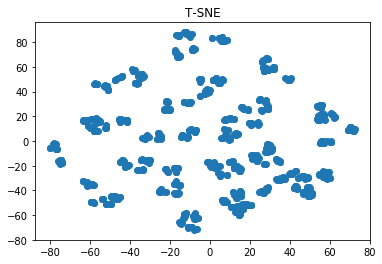

In [7]:
plt.scatter(data_2D[:, 0], data_2D[:, 1])
plt.title("T-SNE")

Here we try different perplexity number, so we can see how it effects structure of data.

In [8]:
data_2D_5 = TSNE(n_components=2, perplexity=5).fit_transform(data)

In [9]:
data_2D_30 = TSNE(n_components=2, perplexity=30).fit_transform(data)

In [10]:
data_2D_50 = TSNE(n_components=2, perplexity=50).fit_transform(data)

In [11]:
data_2D_100 = TSNE(n_components=2, perplexity=500).fit_transform(data)

Text(0.5,1,'T-SNE-5')

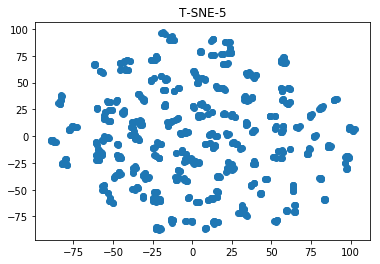

In [12]:
plt.scatter(data_2D_5[:, 0], data_2D_5[:, 1])
plt.title("T-SNE-5")

Text(0.5,1,'T-SNE-30')

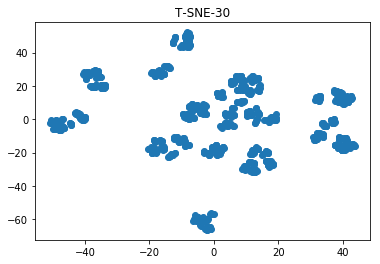

In [13]:
plt.scatter(data_2D_30[:, 0], data_2D_30[:, 1])
plt.title("T-SNE-30")

Text(0.5,1,'T-SNE-50')

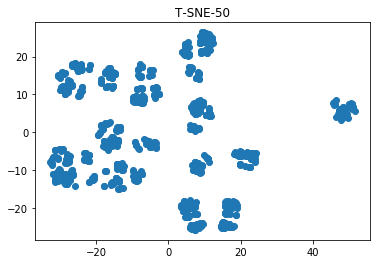

In [14]:
plt.scatter(data_2D_50[:, 0], data_2D_50[:, 1])
plt.title("T-SNE-50")

Text(0.5,1,'T-SNE-500')

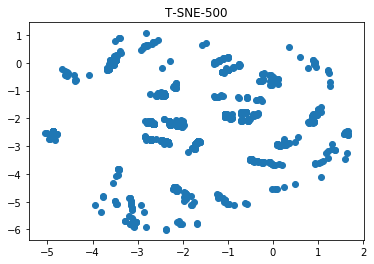

In [15]:
plt.scatter(data_2D_100[:, 0], data_2D_100[:, 1])
plt.title("T-SNE-500")


### Clustering with k-MEANS method

Here we preform clustering on data with k-MEANS method. 

In [16]:
test = data

With elbow method, we try to figure out the optimal number of clusters, but later we check the quality of clustering with silhouette score.

Text(0,0.5,'WCSS')

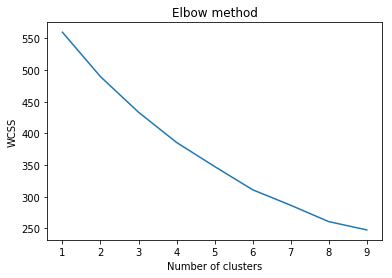

In [17]:
k_means_results = []
for n_clusters in range(1,10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(test)
    k_means_results.append(clusterer.inertia_)
plt.plot(range(1,10),k_means_results)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [18]:
results = {}
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(test)
    silhouette_avg = silhouette_score(test, cluster_labels)
#     print(davies_bouldin_score(test, cluster_labels)," -bouldin")
    print(silhouette_avg," -silhouette")
    results[n_clusters] = cluster_labels

0.267219733821  -silhouette
0.206675715086  -silhouette
0.245021985071  -silhouette
0.258862832565  -silhouette
0.237958548226  -silhouette
0.267703886948  -silhouette
0.260728773521  -silhouette
0.264204062634  -silhouette


In [19]:
def get_cluster_statistic(labels):
    original['clusters'] = pd.Series(labels, index=original.index)
    test2 = original.groupby(['clusters'])
    for cluster in test2:
        for column in cluster[1]:
            print("Cluster: "+ str(cluster[0])+" size of cluster "+str(len(cluster[1]))+"\n")
#             tmp = cluster[1][column].value_counts()
#             print(tmp[0])
#             print(str(tmp.index[0]),tmp[0]/len(cluster[1]))

            print(cluster[1][column].value_counts()/len(cluster[1]),"\n")




In [21]:
get_cluster_statistic(results[4])

Cluster: 0 size of cluster 173

Web           0.306358
Anaconda      0.300578
College       0.144509
School        0.080925
Friends       0.069364
Job           0.040462
Conference    0.005780
Name: Where did you find out about Orange?, dtype: float64 

Cluster: 0 size of cluster 173

Beginner        0.601156
Intermediate    0.317919
Expert          0.075145
Name: What Data Mining level are you?, dtype: float64 

Cluster: 0 size of cluster 173

I'm a student    0.346821
Industry         0.300578
Academia         0.213873
Research         0.115607
0                0.023121
Name: Where do you work?, dtype: float64 

Cluster: 0 size of cluster 173

1    0.676301
0    0.323699
Name: Excel, dtype: float64 

Cluster: 0 size of cluster 173

0    0.861272
1    0.138728
Name: IBM SPSS Statistics, dtype: float64 

Cluster: 0 size of cluster 173

0    0.965318
1    0.034682
Name: KNIME, dtype: float64 

Cluster: 0 size of cluster 173

1    1.0
Name: MATLAB, dtype: float64 

Cluster: 0 size of clu

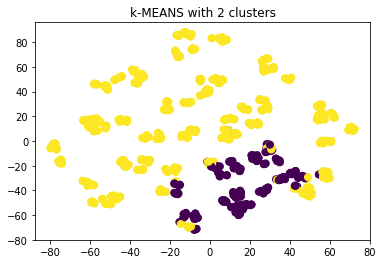

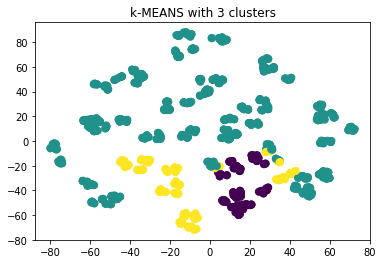

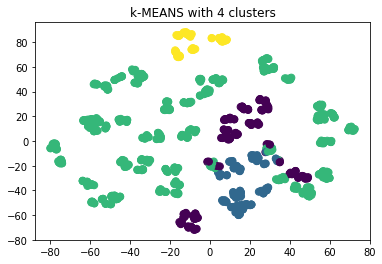

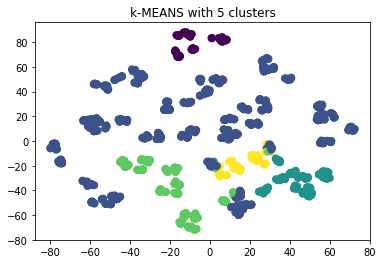

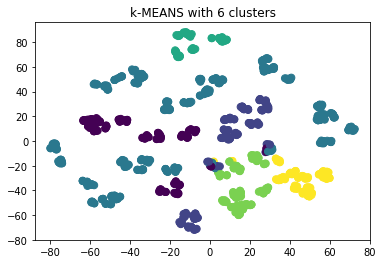

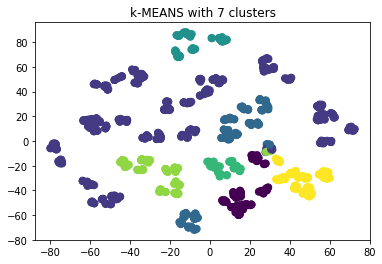

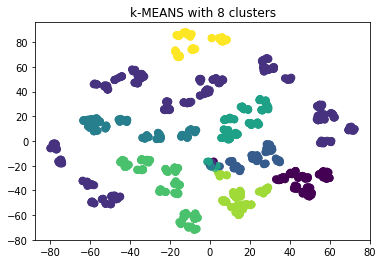

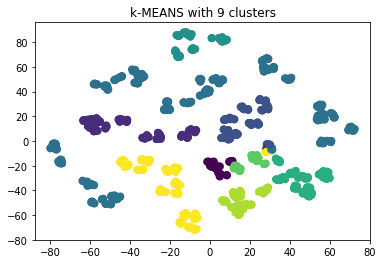

In [23]:
for clusters in results:
    plt.figure()
    plt.scatter(data_2D[:, 0], data_2D[:, 1], c=results[clusters], s=50, cmap='viridis')
    plt.title("k-MEANS with "+str(clusters)+" clusters")


### Clustering with DBSCAN method

Here we preform clustering on data with DBSCAN method. With elbow method, we try to figure out the optimal parameter eps. The results of clustering are rated with the silhouette score.

In [24]:
# this is the function that returns the distance to k-th neighbour
def k_dist(X, metric, k=3):
        data = []
        tree = sk.KDTree(X, leaf_size=30)
        for n,point in enumerate(X):
            dist, ind = tree.query([point], k=k)
            data.append(dist[0].tolist()[k-1])
        return data

Here we preform the elbow method, so we can try to find out the optimal parameter eps.

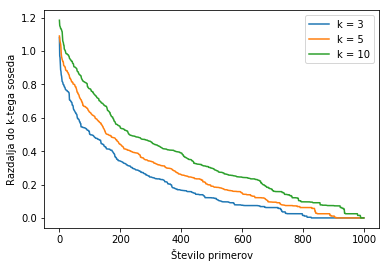

In [25]:
K_2 = k_dist(test.values, '', 3)
K_3 = k_dist(test.values, '', 5)
K_8 = k_dist(test.values, '', 10)
# print(sorted(K_2, reverse=True))
# print(sorted(K_3, reverse=True))
# print(sorted(K_8, reverse=True))
plt.plot(sorted(K_2, reverse=True))
plt.plot(sorted(K_3, reverse=True))
plt.plot(sorted(K_8, reverse=True))
plt.legend(["k = 3", "k = 5", "k = 10"])
plt.xlabel('Število primerov')
plt.ylabel('Razdalja do k-tega soseda')
plt.show()

In [26]:
# X_2 = TSNE(n_components=2 , perplexity=30).fit_transform(test)
db = DBSCAN(eps=0.7, min_samples=10).fit(test)
labels = db.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(test, labels))

# print(labels)

Estimated number of clusters: 5
Estimated number of noise points: 99
Silhouette Coefficient: 0.288


In [27]:
get_cluster_statistic(labels)

Cluster: -1 size of cluster 99

Web           0.454545
Anaconda      0.181818
College       0.151515
School        0.070707
Friends       0.050505
Conference    0.020202
Job           0.010101
Name: Where did you find out about Orange?, dtype: float64 

Cluster: -1 size of cluster 99

Beginner        0.434343
Intermediate    0.424242
Expert          0.141414
Name: What Data Mining level are you?, dtype: float64 

Cluster: -1 size of cluster 99

Industry         0.343434
Academia         0.272727
I'm a student    0.202020
Research         0.141414
0                0.040404
Name: Where do you work?, dtype: float64 

Cluster: -1 size of cluster 99

1    0.727273
0    0.272727
Name: Excel, dtype: float64 

Cluster: -1 size of cluster 99

0    0.626263
1    0.373737
Name: IBM SPSS Statistics, dtype: float64 

Cluster: -1 size of cluster 99

0    0.515152
1    0.484848
Name: KNIME, dtype: float64 

Cluster: -1 size of cluster 99

0    0.737374
1    0.262626
Name: MATLAB, dtype: float64 

Clu

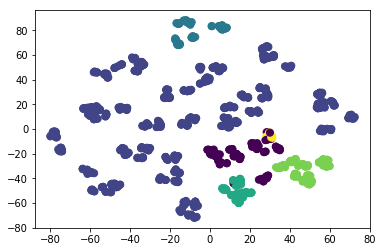

In [28]:
plt.scatter(data_2D[:, 0], data_2D[:, 1], c=labels, s=50, cmap='viridis')

### Comparing clustering results

Comparing clustering results from DBSCAN and k-MEANS methods, using Kappa index.

In [29]:
print("Kappa index \n"+"DBSCAN - "+str(n_clusters_)+" clusters with "+str(n_noise_)+ " noise points\nk-MEANS - 2 clusters\nScore:"+str(cohen_kappa_score(labels, results[2])))

Kappa index 
DBSCAN - 5 clusters with 99 noise points
k-MEANS - 2 clusters
Score:-0.118720083665


In [30]:
print("Mutual info score\n"+"DBSCAN - "+str(n_clusters_)+" clusters with "+str(n_noise_)+ " noise points\nk-MEANS - 2 clusters\nScore: "+str(mutual_info_score(labels, results[2])))

Mutual info score
DBSCAN - 5 clusters with 99 noise points
k-MEANS - 2 clusters
Score: 0.26934442031


### Clustering with Louvain method

In [ ]:
# Replace this with your networkx graph loading depending on your format !
# G=nx.from_pandas_dataframe(test, 0)
G = nx.from_pandas_dataframe(test,source='from',
                                   target='to',edge_attr=True,
                                   create_using=nx.DiGraph())

#first compute the best partition
partition = community.best_partition(G)